<a href="https://colab.research.google.com/github/mogesTesema/Machine-Learning-Mastery-With-TensorFlow/blob/main/04_transfer_learning_in_tensorflow_part_1_feature_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
tensorflow_resnet_50_tensorflow2_classification_1_path = kagglehub.model_download('tensorflow/resnet-50/TensorFlow2/classification/1')
tensorflow_efficientnet_tensorflow2_b0_feature_vector_1_path = kagglehub.model_download('tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1')

print('Data source import complete.')



  0%|          | 0.00/97.8M [00:00<?, ?B/s]



  0%|          | 0.00/4.72M [00:00<?, ?B/s]




100%|██████████| 16.8k/16.8k [00:00<00:00, 33.1MB/s]

  1%|          | 1.00M/97.8M [00:00<00:38, 2.64MB/s]
  3%|▎         | 3.00M/97.8M [00:00<00:13, 7.31MB/s]
  9%|▉         | 9.00M/97.8M [00:00<00:04, 19.9MB/s]

 21%|██        | 1.00M/4.72M [00:00<00:01, 2.65MB/s]

 64%|██████▎   | 3.00M/4.72M [00:00<00:00, 7.32MB/s]
100%|██████████| 4.72M/4.72M [00:00<00:00, 8.97MB/s]

 15%|█▌        | 15.0M/97.8M [00:00<00:03, 21.9MB/s]
 22%|██▏       | 22.0M/97.8M [00:01<00:02, 32.4MB/s]
 27%|██▋       | 26.0M/97.8M [00:01<00:02, 33.7MB/s]
 31%|███       | 30.0M/97.8M [00:01<00:02, 34.4MB/s]
 36%|███▌      | 35.0M/97.8M [00:01<00:01, 35.5MB/s]
 42%|████▏     | 41.0M/97.8M [00:01<00:02, 29.6MB/s]
 49%|████▉     | 48.0M/97.8M [00:01<00:01, 36.2MB/s]
 56%|█████▌    | 55.0M/97.8M [00:01<00:01, 41.6MB/s]
 64%|██████▍   | 63.0M/97.8M [00:02<00:00, 46.9MB/s]
 72%|███████▏  | 70.0M/97.8M [00:02<00:00, 50.0MB/s]
 77%|███████▋  | 75.0M/97.8M [00:02<00:00, 43.4MB/s]
 82%|████████▏ | 80.0M/97.8M [00:02<00:


  0%|          | 0.00/15.6M [00:00<?, ?B/s]



  0%|          | 0.00/5.82M [00:00<?, ?B/s]




100%|██████████| 5.71k/5.71k [00:00<00:00, 11.3MB/s]

  6%|▋         | 1.00M/15.6M [00:00<00:05, 2.64MB/s]
 19%|█▉        | 3.00M/15.6M [00:00<00:01, 7.31MB/s]
 51%|█████▏    | 8.00M/15.6M [00:00<00:00, 19.4MB/s]

 17%|█▋        | 1.00M/5.82M [00:00<00:01, 2.59MB/s]
100%|██████████| 15.6M/15.6M [00:00<00:00, 21.0MB/s]


100%|██████████| 5.82M/5.82M [00:00<00:00, 10.4MB/s]

Data source import complete.


# Transfer Learning with Tensorflow Part 1: Feature Extraction
Transfer learning is leveraging a working model's existing architecture and learned patterns for our own problem.
There are two main benefites
* 1. Can leverage an existing neural network architecture proven to work on problems similar to our own.


* 2. Can leverage a working neural network architecture which has already learned patterns o similar data to  our own, then we can adapt those patterns to our own data.

In [3]:
# !pip install tensorflow
import tensorflow as tf

!nvidia-smi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 844.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.8 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


/bin/bash: line 1: nvidia-smi: command not found


In [8]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Download and become one with data


In [6]:
# Get data (10% of 10 food classes from food101)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-10-17 05:12:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   133MB/s    in 1.2s    

2025-10-17 05:12:35 (133 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [9]:
import zipfile
with zipfile.ZipFile("10_food_classes_10_percent.zip") as ziped_ref:
  ziped_ref.extractall()


In [ ]:
!ls 10_food_classes_10_percent/train/hamburger

1010140.jpg  1670180.jpg  2256750.jpg  3088660.jpg  3796218.jpg  583603.jpg
1036215.jpg  1709710.jpg  2278946.jpg  3101158.jpg  3805565.jpg  604162.jpg
1038553.jpg  1761259.jpg  248136.jpg   3125905.jpg  3878886.jpg  607735.jpg
1086335.jpg  1802721.jpg  2534877.jpg  3140576.jpg  3912017.jpg  699176.jpg
1122669.jpg  1818289.jpg  2565475.jpg  3156598.jpg  396083.jpg	 73340.jpg
1181766.jpg  1821268.jpg  2671820.jpg  3312172.jpg  419342.jpg	 73783.jpg
1228951.jpg  1822493.jpg  2722745.jpg  3346138.jpg  423924.jpg	 76817.jpg
124124.jpg   1828545.jpg  2797268.jpg  3354260.jpg  446192.jpg	 816775.jpg
1301947.jpg  1879189.jpg  29455.jpg    3486079.jpg  460108.jpg	 91789.jpg
1335771.jpg  1903326.jpg  2953924.jpg  3488531.jpg  477600.jpg	 985020.jpg
153931.jpg   2154348.jpg  2988095.jpg  3530013.jpg  509480.jpg
1585333.jpg  2207445.jpg  3069250.jpg  3583066.jpg  554810.jpg
1635356.jpg  2223416.jpg  3083927.jpg  379510.jpg   577673.jpg


In [10]:
import os
import pathlib

for dirpath, dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 2 directories and 0 images in 10_food_classes_10_percent
there are 10 directories and 0 images in 10_food_classes_10_percent/test
there are 0 directories and 250 images in 10_food_classes_10_percent/test/ice_cream
there are 0 directories and 250 images in 10_food_classes_10_percent/test/grilled_salmon
there are 0 directories and 250 images in 10_food_classes_10_percent/test/pizza
there are 0 directories and 250 images in 10_food_classes_10_percent/test/ramen
there are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_wings
there are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_curry
there are 0 directories and 250 images in 10_food_classes_10_percent/test/sushi
there are 0 directories and 250 images in 10_food_classes_10_percent/test/steak
there are 0 directories and 250 images in 10_food_classes_10_percent/test/fried_rice
there are 0 directories and 250 images in 10_food_classes_10_percent/test/hamburger
there are 10 directori

## Create data loaders (preparing the data)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32
EPOCHS = 5
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"
train_datagen = ImageDataGenerator(rescale=1/225.)
test_datagen = ImageDataGenerator(rescale=1/225.)
print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical"
                                             )


Training images:
Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [12]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"
train_dataset_10_percent = image_dataset_from_directory(train_dir,
                                                             label_mode="categorical",
                                                             batch_size=32,
                                                             image_size=(224,224),
                                                             shuffle=True

                                                             )
test_dataset = image_dataset_from_directory(test_dir,
                                           label_mode="categorical",
                                           batch_size=32,
                                           image_size=(224,224),
                                           shuffle=False)
print(train_dataset_10_percent,test_dataset)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))> <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


In [ ]:
# # normalizing training and validation datasets
# rescale_layer = tf.keras.layers.Rescaling(1./225)
# train_dataset_10_percent_rescaled = train_data_10_percent_dataset.map(lambda data,label:(rescale_layer(data),label))
# test_dataset_rescaled = test_dataset.map(lambda data,label:(rescale_layer(data),label))
# print(train_dataset_10_percent_rescaled)

In [13]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_dataset_10_percent = train_data_10_percent.prefetch(buffer_size=AUTOTUNE)
# test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


In [14]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1/255.),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomFlip("vertical"),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomRotation(0.2)
])
# train_dataset_10_percent_rescaled = train_dataset_10_percent_rescaled.map(lambda data,label:(data_augmentation(data,training=True),label))

In [ ]:
def create_model(model_url,num_classes):
  """
  Takes a Tensorflow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
    should be equeal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequentail model wtih model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.

  """
  # Download the pretrained model and save it as keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer",
                                           input_shape=IMAGE_SHAPE +(3,) # 3 for rgb color
                                           ) #freeze already learned patterns

  # Create our own model
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(10,activation="softmax",name="output layer")
      ])

  return model


## Setting up callbacks (this to run whilst our model trains)
coallbacks are extra functionality you can add to your models to be performed during or after training. Some of the most popular coallbacks:
* Tracking experiments with the TensorBoard callbacks
* Model checkpoint with the ModelCheckpoint callbacks
* Stopping a model from training (before it trains too long and overfits) with the EarlyStopping callbacks

In [15]:
# Create tensorboard callback( functionized because we need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = os.path.join(dir_name,experiment_name,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to : {log_dir}")
  return tensorboard_callback



### Creating and testing ResNet kaggle Hub Feature Extraction model

\## Creating a models using Kaggle Hub
In the past we've used TensorFlow to create our own models layer by layer from scratch.

Now we're going to do a similar process, except the majority of our model's layers are going to come from Kaggle Hub.
We can access pretrained models [here](https://www.kaggle.com/models/tensorflow/efficientnet/tensorFlow2/b0-feature-vector/1?tfhub-redirect=true&utm_source=chatgpt.com)

In [ ]:
# !pip install tensorflow_hub
from tensorflow import keras
import tensorflow_hub as hub
class ResNetLayer(keras.layers.Layer):
    def __init__(self, resNet_feature_extractor_url, **kwargs):
        super().__init__(**kwargs)
        # create the hub layer inside init
        self.resNet_feature_extractor_url = resNet_feature_extractor_url
        self.resNet_feature_extractor = hub.KerasLayer(resNet_feature_extractor_url)

    def call(self, inputs):
        return self.resNet_feature_extractor(inputs)

    def get_config(self):
        config = super().get_config()
        config.update({
            "resNet_feature_extractor_url": self.resNet_feature_extractor_url
        })
        return config


resNet_feature_extractor = ResNetLayer("https://www.kaggle.com/models/tensorflow/resnet-50/TensorFlow2/classification/1")

resNet_model = tf.keras.Sequential([
    keras.Input(shape=(224,224,3)),
    data_augmentation,
    resNet_feature_extractor,
    keras.layers.Dense(10,activation="softmax")
])
resNet_model.compile(loss="categorical_crossentropy",
                     optimizer="adam",
                     metrics=["accuracy"])
history_resNet_model = resNet_model.fit(train_dataset_10_percent,
                                        epochs=20,
                                        steps_per_epoch=len(train_dataset_10_percent),
                                        validation_data=test_dataset,
                                        validation_steps=len(test_dataset),
                                        callbacks=[create_tensorboard_callback("TensorFlow_Hub","resNet_model")]
                                        )


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.4 MB/s eta 0:00:00
Saving TensorBoard log files to : TensorFlow_Hub/resNet_model/20251017-051457
Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 209s 9s/step - accuracy: 0.1449 - loss: 2.2997 - val_accuracy: 0.2964 - val_loss: 2.2867
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 203s 9s/step - accuracy: 0.2674 - loss: 2.2880 - val_accuracy: 0.4196 - val_loss: 2.2709
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 204s 9s/step - accuracy: 0.3932 - loss: 2.2755 - val_accuracy: 0.4460 - val_loss: 2.2554
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 203s 9s/step - accuracy: 0.4384 - loss: 2.2646 - val_accuracy: 0.4640 - val_loss: 2.2412
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 202s 9s/step - accuracy: 0.4889 - loss: 2.2539 - val_accuracy: 0.5404 - val_loss: 2.2264
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5028 - loss: 2.2447

In [ ]:
resNet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ res_net_layer (ResNetLayer)     │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        10,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,062 (117.43 KB)

 Trainable params: 10,020 (39.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,042 (78.29 KB)

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(0,len(loss))
  plt.plot(epochs,loss,label="training loss",color="red")
  plt.plot(epochs,val_loss,label="validation loss")
  plt.title("training and validation loss over epoch")
  plt.xlabel("epoch")
  plt.ylabel("val and training loss")
  plt.legend()
  plt.figure()
  plt.plot(epochs,accuracy,label="training accuracy",color="green")
  plt.plot(epochs,val_accuracy,label="validation accuracy")
  plt.title("validation and training accuracy")
  plt.xlabel("epochs")
  plt.ylabel("val and training accuracy")
  plt.legend()

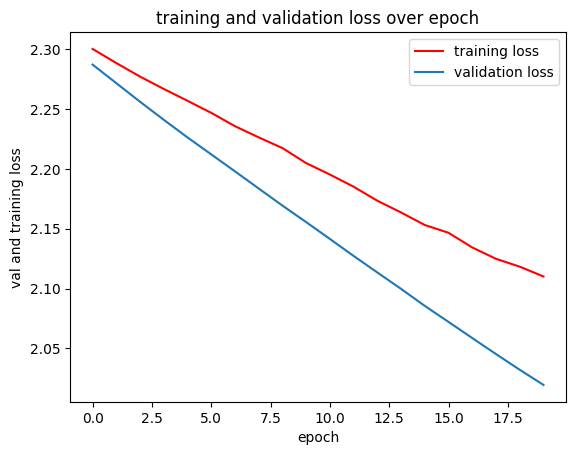

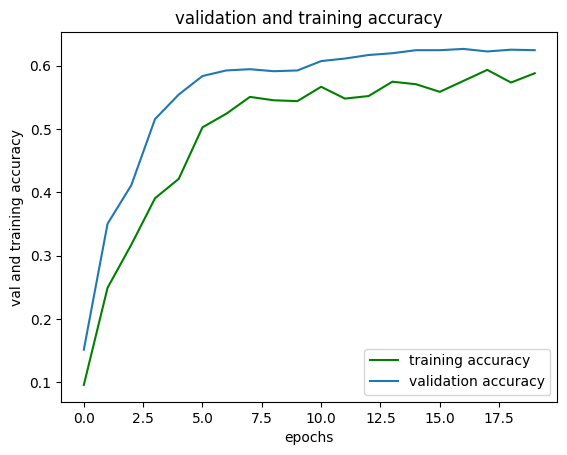

In [ ]:
plot_loss_curves(history_resNet_model)

In [ ]:


# Step 3: Wrap the SavedModel in a Keras Layer
class EfficientNetLayer(keras.layers.Layer):
    def __init__(self, resNet_feature_extractor_url, **kwargs):
        super().__init__(**kwargs)
        # create the hub layer inside init
        self.resNet_feature_extractor_url = resNet_feature_extractor_url
        self.resNet_feature_extractor = hub.KerasLayer(resNet_feature_extractor_url)

    def call(self, inputs):
        return self.resNet_feature_extractor(inputs)

    def get_config(self):
        config = super().get_config()
        config.update({
            "efficientNet_feature_extractor_url": self.resNet_feature_extractor_url
        })
        return config

# Step 4: Build Sequential model
num_classes = 10

model = keras.Sequential([
    keras.Input(shape=(224, 224, 3)),
    data_augmentation,# input layer
    EfficientNetLayer("https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"),
    # keras.layers.Dropout(0.5),  # regularization
    keras.layers.Dense(num_classes, activation='softmax')  # classifier
])

# model.layers[0].resNet_feature_extractor.trainable = False # Freeze already learned patterns
# Step 5: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)




In [ ]:
model_weights = model.get_weights()
len(model_weights)


2

In [ ]:
efficient_history = model.fit(train_dataset_10_percent,
          epochs=20,
          steps_per_epoch=len(train_dataset_10_percent),
          validation_data=test_dataset,
          validation_steps=len(test_dataset),
          callbacks=[create_tensorboard_callback(dir_name="TensorFlow_Hub",experiment_name="EffiecientNet")]
          )

Saving TensorBoard log files to : TensorFlow_Hub/EffiecientNet/20251016-103833
Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 332ms/step - accuracy: 0.2172 - loss: 2.2118 - val_accuracy: 0.6572 - val_loss: 1.5043
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.6178 - loss: 1.4681 - val_accuracy: 0.7660 - val_loss: 1.0595
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - accuracy: 0.7269 - loss: 1.0839 - val_accuracy: 0.8024 - val_loss: 0.8456
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.7909 - loss: 0.8854 - val_accuracy: 0.8216 - val_loss: 0.7301
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.7879 - loss: 0.8155 - val_accuracy: 0.8324 - val_loss: 0.6561
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.8427 - loss: 0.7104 - val_accuracy: 0.8348 - val_loss: 0.6098
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.8404 - loss: 0.6508 - val_accuracy: 0.8476 - val_loss: 0.5697
Epoch 8/20
24/24 ━━━━━━━

In [ ]:
!pwd


/kaggle/working


In [ ]:
model.save("/kaggle/working/efficientNet.keras")

In [ ]:
resNet_model.save("/kaggle/working/resNet_model.keras")

## Visualize the pre-trained model

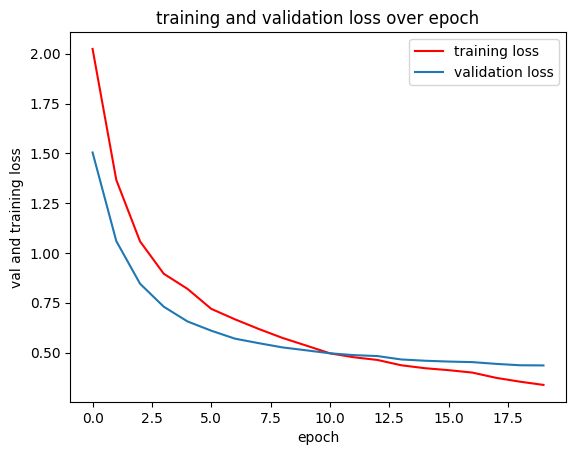

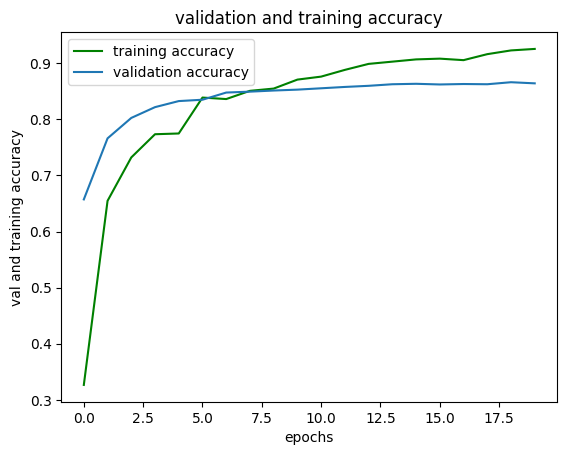

In [ ]:
plot_loss_curves(efficient_history)

In [ ]:
!ls -la

total 329552
drwxr-xr-x 6 root root      4096 Oct 16 10:49 .
drwxr-xr-x 5 root root      4096 Oct 16 09:34 ..
drwxr-xr-x 4 root root      4096 Oct 16 09:34 10_food_classes_10_percent
-rw-r--r-- 1 root root 168546183 Feb 12  2021 10_food_classes_10_percent.zip
-rw-r--r-- 1 root root 168546183 Feb 12  2021 10_food_classes_10_percent.zip.1
-rw-r--r-- 1 root root    186701 Oct 16 10:48 efficientNet.keras
drwxr-xr-x 3 root root      4096 Oct 16 09:34 __MACOSX
-rw-r--r-- 1 root root    153215 Oct 16 10:49 resNet_model.keras
drwxr-xr-x 4 root root      4096 Oct 16 10:38 TensorFlow_Hub
drwxr-xr-x 2 root root      4096 Oct 16 09:34 .virtual_documents


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,expand_nested=True,show_layer_names=True)

### Internal Archticture of EfficientNetBO Neural network

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

feature_extractor = EfficientNetB0(
    include_top=False, weights='imagenet', pooling='avg', input_shape=(224,224,3)
)
# feature_extractor.summary()


In [ ]:
API_KEY = 'a0ac1d7bf9160805512283eb8f37ad7a757d8dd6'

In [ ]:
import tensorflow as tf

import tensorflow_hub as hub
num_classes = 10
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
m.build([None, 224, 224, 3])  # Batch input shape.


In [ ]:
!pip install wandb

In [ ]:
import wandb
wandb.login(key="a0ac1d7bf9160805512283eb8f37ad7a757d8dd6")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: mogesastu2124 (moges-densatechnology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
!pwd

/kaggle/working


In [ ]:
!wandb sync --project model_comparision /kaggle/working/TensorFlow_Hub/

Find logs at: /tmp/debug-cli.root.log
Found 4 tfevent files in /kaggle/working/TensorFlow_Hub
wandb: WARNING Found 4 directories containing tfevent files. If these represent multiple experiments, sync them individually or pass a list of paths.
Syncing: https://wandb.ai/moges-densatechnology/model_comparision/runs/5v18jmza ...
2025-10-15 06:49:11.424147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760510951.449325    1081 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760510951.457133    1081 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
